In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv3D, MaxPooling3D,Conv2D,AveragePooling2D,AveragePooling3D
from keras.layers import Dense, GlobalAveragePooling3D,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, Adadelta
from keras.utils import np_utils, generic_utils, Sequence
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional_recurrent import ConvLSTM2D
import keras

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
import random

Using TensorFlow backend.


In [7]:
# image specification
img_cols,img_rows=64,64
nb_frames = 663    # img_depth or number of frames used for each video
# CNN Training parameters
nb_classes = 27
channels = 2

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# integer encode
labels = pd.read_csv('E:\Jupyter\Project\jester-v1-labels.csv',sep=';',header=None,names=['Class'])     # reading the csv file
label_encoder = LabelEncoder()
labels['Label'] = label_encoder.fit_transform(labels['Class'])

#train
train = pd.read_csv('E:\Jupyter\Project\jester-v1-train.csv',sep=';',header=None,names=['Video','Class'])     # reading the csv file
train['Label'] = label_encoder.fit_transform(train['Class'])

#validation
validation = pd.read_csv('E:\Jupyter\Project\jester-v1-validation.csv',sep=';',header=None,names=['Video','Class'])     # reading the csv file
validation['Label'] = label_encoder.fit_transform(validation['Class'])

#test
#test = pd.read_csv('E:\Jupyter\Project\jester-v1-test.csv',sep=';',header=None,names=['Video'])     # reading the csv file

#print labels
#labels
"""
partition_dict = {
    "train": train["Video"].tolist(),
    "validation": validation["Video"].tolist()
}"""
temp = pd.concat([train, validation])
temp = temp.set_index("Video")
temp.transpose()
labels_dict = temp["Label"].to_dict()

In [9]:
# Define model
weight_decay = 0.00005
import tensorflow as tf
keras=tf.contrib.keras
l2=keras.regularizers.l2

model = Sequential()
model.add(Conv3D(16,(3,3,3),
                        input_shape=(nb_frames, img_cols, img_rows, channels),
                        activation='relu'))
model.add(Conv3D(16,(3,3,3), strides=(2,2,2),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_1', activation = 'relu'))
model.add(Conv3D(4,(4,4,4), strides=(2,2,2),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2', activation = 'relu'))
model.add(Conv3D(4,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_3', activation = 'relu'))
model.add(Conv3D(4,(2,2,2), strides=(2,2,2),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_4', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_5', activation = 'relu'))
model.add(Conv3D(8,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_6', activation = 'relu'))
model.add(Conv3D(8,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_7', activation = 'relu'))
model.add(Conv3D(8,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_8', activation = 'relu'))
model.add(Conv3D(32,(2,2,2), strides=(2,2,2),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_9', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_10', activation = 'relu'))
model.add(Conv3D(16,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_11', activation = 'relu'))
model.add(Conv3D(16,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_12', activation = 'relu'))
model.add(Conv3D(64,(2,2,2), strides=(2,2,2),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_13', activation = 'relu'))
model.add(Conv3D(16,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_14', activation = 'relu'))
model.add(Conv3D(16,(1,1,1), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_15', activation = 'relu'))
model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm1'))

model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2'))

model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm3'))


#model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
#model.add(Flatten())
model.add(GlobalAveragePooling3D())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer='normal'))

model.add(Activation('softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 661, 62, 62, 16)   880       
_________________________________________________________________
Conv3D_1 (Conv3D)            (None, 331, 31, 31, 16)   6912      
_________________________________________________________________
Conv3D_2 (Conv3D)            (None, 166, 16, 16, 4)    4096      
_________________________________________________________________
Conv3D_3 (Conv3D)            (None, 166, 16, 16, 4)    16        
_________________________________________________________________
Conv3D_4 (Conv3D)            (None, 83, 8, 8, 4)       128       
_________________________________________________________________
Conv3D_5 (Conv3D)            (None, 83, 8, 8, 64)      6912      
_________________________________________________________________
Conv3D_6 (Conv3D)            (None, 83, 8, 8, 8)       512       
__________

In [11]:
import os
save_dir = os.path.join(os.getcwd(),'save_model')
print(os.getcwd())
model_name = "3DCNN+3LSTM_64_6_jester"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_acc', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose =1)

E:\Jupyter\Project


In [12]:
sgd = SGD(lr=0.003,  momentum=0.9, nesterov=False)
rms = RMSprop(decay=1e-6)
ada = Adadelta(lr=0.1,decay=1e-6)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              #optimizer=ada,
              #optimizer = Adam(lr=0.0001),
              metrics=['acc'])

In [13]:
def id_gen(id_list):
    while True:
        yield random.sample(id_list,64)

def data_gen(train_batches):
    while True:
        batch_IDs = next(train_batches)
        
        for vid_ID in batch_IDs:
            X_tr=[]
            label=[]
            frames = []
            frame_count=0
            pos_dir = os.path.join("E:/Jupyter/Project/generated_images512_timeSampled/pos",str(vid_ID))
            neg_dir = os.path.join("E:/Jupyter/Project/generated_images512_timeSampled/neg",str(vid_ID))
            for img_ID in sorted(os.listdir(pos_dir)):
                if frame_count < nb_frames:
                    pos = os.path.join(pos_dir,img_ID)
                    neg = os.path.join(neg_dir,img_ID)
                    p_img = cv2.imread(pos,0)
                    p_img = cv2.resize(p_img,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
                    n_img = cv2.imread(neg,0)
                    n_img = cv2.resize(n_img,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
                    frame = cv2.merge((p_img,n_img))
                    frames.append(frame)
                    frame_count+=1
                else:
                    break
            while frame_count < nb_frames:
                frames.append(np.zeros((img_cols,img_rows,channels), np.uint8))
                frame_count+=1
            input_img = np.array(frames)
            ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
            ipt=np.rollaxis(ipt,2,0)
            X_tr.append(ipt)
            label.append(labels_dict[vid_ID])
        num_samples = len(X_tr) 

        X_tr_array = np.array(X_tr)   # convert the frames read into array

        Y_train = np_utils.to_categorical(label, nb_classes)

        yield X_tr_array,Y_train
        

In [14]:
batch_size = 32
#steps_per_epoch=int((len(X_val_new)*1.5)/batch_size)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.05, 
                               cooldown=0, patience=10, min_lr=0.005/(2^4),verbose=1)

# Parameters
params = {'dim': (nb_frames,img_cols,img_rows),
          'batch_size': batch_size,
          'n_classes': nb_classes,
          'n_channels': channels,
          'shuffle': True}

training_generator = data_gen(id_gen(train["Video"].tolist()))
validation_generator = data_gen(id_gen(validation["Video"].tolist()))

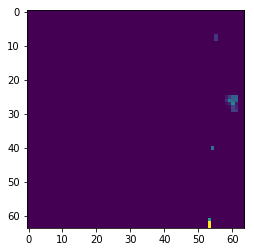

In [15]:
batches = training_generator
x_batch, y_batch = next(batches)

p,n = cv2.split (x_batch[0][0])
plt.imshow(p)
#print(x_batch, y_batch)

In [31]:
print(training_generator)
print(next(training_generator))

<generator object data_gen at 0x000002845E8CC518>
(array([[[[[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         ...,

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]]],


        [[[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
   

In [16]:
nb_epoch = 512
#nb_epoch = 131072
hist = model.fit_generator(
    generator=training_generator,
    validation_data=validation_generator,
    epochs = nb_epoch,
    callbacks=[checkpoint,lr_reducer],
    steps_per_epoch = 1,
    validation_steps = 256,
    verbose = 2
    )

Epoch 1/512
 - 5423s - loss: 3.4941 - acc: 0.0000e+00 - val_loss: 3.4904 - val_acc: 0.0234

Epoch 00001: val_acc improved from -inf to 0.02344, saving model to E:\Jupyter\Project\save_model\3DCNN+3LSTM_64_6_jester
Epoch 2/512
 - 30366s - loss: 3.4686 - acc: 0.0000e+00 - val_loss: 3.4903 - val_acc: 0.0156

Epoch 00002: val_acc did not improve from 0.02344
Epoch 3/512
 - 455s - loss: 3.4491 - acc: 1.0000 - val_loss: 3.4900 - val_acc: 0.0312

Epoch 00003: val_acc improved from 0.02344 to 0.03125, saving model to E:\Jupyter\Project\save_model\3DCNN+3LSTM_64_6_jester
Epoch 4/512
 - 378s - loss: 3.4927 - acc: 0.0000e+00 - val_loss: 3.4897 - val_acc: 0.0234

Epoch 00004: val_acc did not improve from 0.03125
Epoch 5/512
 - 357s - loss: 3.4873 - acc: 0.0000e+00 - val_loss: 3.4918 - val_acc: 0.0273

Epoch 00005: val_acc did not improve from 0.03125
Epoch 6/512
 - 351s - loss: 3.4801 - acc: 0.0000e+00 - val_loss: 3.4896 - val_acc: 0.0273

Epoch 00006: val_acc did not improve from 0.03125
Epoch 7/


Epoch 00055: val_acc did not improve from 0.13281
Epoch 56/512
 - 359s - loss: 3.5998 - acc: 0.0000e+00 - val_loss: 3.4760 - val_acc: 0.1172

Epoch 00056: val_acc did not improve from 0.13281
Epoch 57/512
 - 368s - loss: 3.5107 - acc: 0.0000e+00 - val_loss: 3.4754 - val_acc: 0.0977

Epoch 00057: val_acc did not improve from 0.13281
Epoch 58/512
 - 351s - loss: 3.3418 - acc: 0.0000e+00 - val_loss: 3.4826 - val_acc: 0.0781

Epoch 00058: val_acc did not improve from 0.13281

Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.0008333333333333334.
Epoch 59/512
 - 342s - loss: 3.3300 - acc: 0.0000e+00 - val_loss: 3.4734 - val_acc: 0.1055

Epoch 00059: val_acc did not improve from 0.13281
Epoch 60/512
 - 364s - loss: 3.4386 - acc: 0.0000e+00 - val_loss: 3.4748 - val_acc: 0.0898

Epoch 00060: val_acc did not improve from 0.13281
Epoch 61/512
 - 337s - loss: 3.4811 - acc: 0.0000e+00 - val_loss: 3.4650 - val_acc: 0.1289

Epoch 00061: val_acc did not improve from 0.13281
Epoch 62/512
 - 

 - 325s - loss: 3.6208 - acc: 0.0000e+00 - val_loss: 3.4707 - val_acc: 0.1289

Epoch 00110: val_acc did not improve from 0.13672
Epoch 111/512
 - 348s - loss: 3.5873 - acc: 0.0000e+00 - val_loss: 3.4780 - val_acc: 0.0977

Epoch 00111: val_acc did not improve from 0.13672
Epoch 112/512
 - 341s - loss: 3.2170 - acc: 1.0000 - val_loss: 3.4736 - val_acc: 0.0898

Epoch 00112: val_acc did not improve from 0.13672
Epoch 113/512
 - 341s - loss: 3.5756 - acc: 0.0000e+00 - val_loss: 3.4614 - val_acc: 0.1172

Epoch 00113: val_acc did not improve from 0.13672
Epoch 114/512
 - 408s - loss: 3.5775 - acc: 0.0000e+00 - val_loss: 3.4814 - val_acc: 0.0938

Epoch 00114: val_acc did not improve from 0.13672
Epoch 115/512
 - 413s - loss: 3.4315 - acc: 0.0000e+00 - val_loss: 3.4848 - val_acc: 0.0781

Epoch 00115: val_acc did not improve from 0.13672

Epoch 00115: ReduceLROnPlateau reducing learning rate to 0.0008333333333333334.
Epoch 116/512
 - 400s - loss: 3.6420 - acc: 0.0000e+00 - val_loss: 3.4642 - val

KeyboardInterrupt: 

In [17]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

training_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

NameError: name 'hist' is not defined

In [18]:
from keras.models import Model, load_model
model1_name = "3DCNN+3LSTM_64_6_jester"
model1_path = os.path.join(save_dir, model1_name)
model1 = load_model(model1_path)


In [23]:
test_pred =model1.predict_generator(validation_generator, steps = 256)
result = np.argmax(test_pred, axis =1)
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
img_array = X_train_new[50]
from sklearn.metrics import confusion_matrix
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model1.predict(X_val_new),axis =1))
print(met)

NameError: name 'y_val_new' is not defined

In [28]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=True, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
confusion_matrix_plot(met, classes=labels["Class"].tolist())

NameError: name 'met' is not defined

In [ ]:
from keras.models import Model, load_model
model2_name = "3DCNN+3LSTM_64_6_jester"
#model2_name = "3DCNN_LRN_300_6_jester"
#model2_name = "3DCNN_HRN_300_6_jester"
model2_path = os.path.join(save_dir, model2_name)
model2 = load_model(model2_path)
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model2.predict(X_val_new),axis =1))
print(met)

In [ ]:
model2.evaluate(X_val_new,y_val_new)

In [ ]:
for i in range(10):
    we=(i+1)/10
    we_2=1-we
    met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(we*model2.predict(X_val_new)+we_2*model1.predict(X_val_new),axis =1))
    print((met[0,0]+met[1,1]+met[2,2]+met[3,3]+met[4,4]+met[5,5])/360)